<h3>Employee Promotion Prediction</h3>
<br><h5>The task is to predict whether a given employee will be promoted or not.<br>
The following details for an employee is given :-</h5><br>
    Department<br>
    Region <br>
    Education<br>
    Gender<br>
    Recruitment channel<br>
    No of trainings<br>
    Age<br>
    Previous year ratings<br>
    Length of service<br>
    KPIs met(1 if >80%) <br>
    Average training score<br>
<h5>The target column is - is_promoted.</h5>

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

df = pd.read_csv("./employeePromotion.csv")

In [294]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [295]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

The describe() method gives a general view of the numerical data in the sample space.<br>
The isnull().sum() chaining gave us an idea of the missing value counts in each column. Education and Previous year ratings have missing values and have to be handled. 

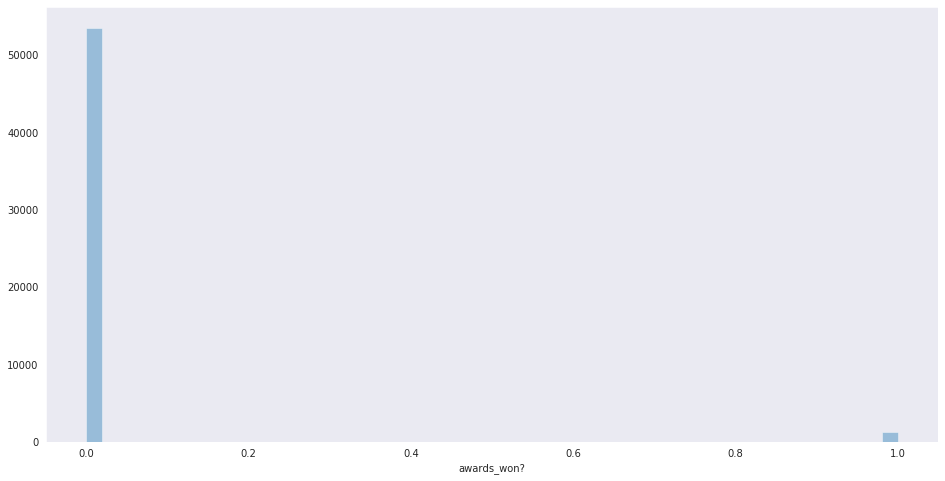

In [296]:
plt.figure(figsize=(16,8))
sns.set_style('dark')
sns.distplot(df['awards_won?'],kde=False,label='awards won')
plt.show()

In [297]:
print("For promotion = False\n",df[df.is_promoted == 0]['awards_won?'].value_counts())
print("For promotion = True\n",df[df.is_promoted == 1]['awards_won?'].value_counts())

For promotion = False
 0    49429
1      711
Name: awards_won?, dtype: int64
For promotion = True
 0    4109
1     559
Name: awards_won?, dtype: int64


The True values for this column is very small as compared to the False value. We cannot surely say that if the employee has won an award, the employee is definetly getting promoted. Logically awards should have some positive correlation to getting a promotion.

In [298]:
df.education = df.education.fillna(df.education.mode()[0])

The education has missing values, we can fill it by mode, that would show minimum criteria for education the company requires.<br>
The education can be filled by mode as people working at the company are likely to have some basic education and the missing value is likely to be recording error.

In [299]:
service_filter = df[df.length_of_service == 1]
print("Null rating counts of employees with length of service 1\n",service_filter.previous_year_rating.isnull().sum())
print("Null rating counts of employees with length of service 1 and promoted\n",service_filter[service_filter.is_promoted == 1].previous_year_rating.isnull().sum())
df.previous_year_rating = df.previous_year_rating.fillna(0)

Null rating counts of employees with length of service 1
 4124
Null rating counts of employees with length of service 1 and promoted
 339


The Previous year rating column contains missing values and all of them belong to employees having 1 year of Service length. Meaning alot of the new employees dont have records for this column. Filling it with 0's would be right as it is the min rating.<br>
We cannot prune the rows with missing values as there are 339 promoted employees who have service length as 1 and have missing ratings. Filling it with mean would uneccesarily give a newer employee higher rating.

In [300]:
df.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.002350,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.064119,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.177935,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.002350,-0.064119,0.177935,1.000000,0.191163,0.274593,0.021475,0.058718,0.125991
length_of_service,0.001274,-0.057275,0.657111,0.191163,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.274593,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.021475,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.058718,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.125991,-0.010670,0.221582,0.195871,0.181147,1.000000


The corr() function gives us insight into the correaltion of numerical columns between each other in a matrix form. This can give us an idea as to which columns can impact the model either positively(predicting 1) or negatively(predicting 0) and which columns add no insight to the model.

In [301]:
df.drop(['employee_id','region','recruitment_channel'],axis=1,inplace=True)

Dropping the columns Region and Id. The region column is categorical and has many levels.Logically it has no impact on promotions. <br>
Converting it to dummy columns will increase the number of columns for the model. The Id is to be removed as well as it is unique for each entry in sample space.

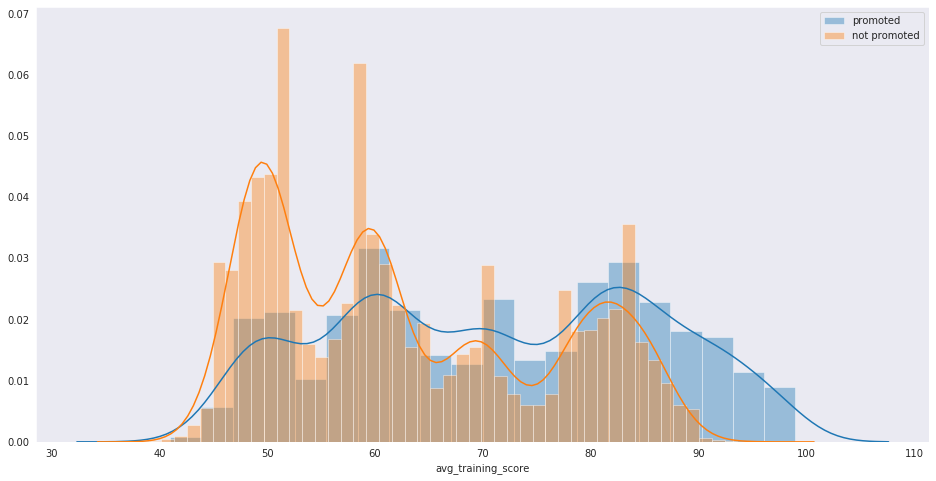

In [302]:
plt.figure(figsize=(16,8))
sns.set_style('dark')
sns.distplot(df[df.is_promoted == 1].avg_training_score,kde=True,label='promoted')
sns.distplot(df[df.is_promoted == 0].avg_training_score,kde=True,label='not promoted')
plt.legend()

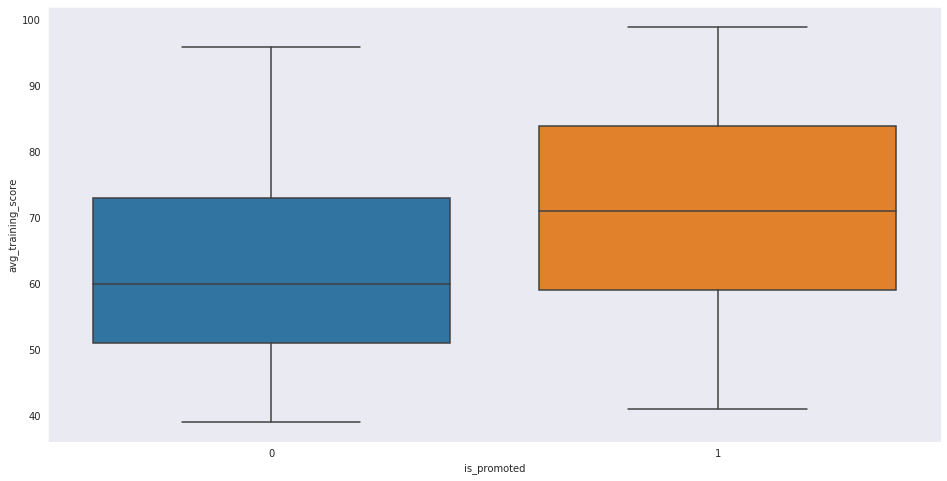

In [316]:
plt.figure(figsize=(16,8))
sns.set_style('dark')
sns.boxplot(x=df.is_promoted,y=df.avg_training_score)

The distribution for avg_training_score for Class true and false shows a small region towards the end where when socres increase the promotion chances increase i.e. a slightly positive correlation. Adding this to the model can be useful for cases having high training score are classified indefinetly and low training score is correlated to other attributes

In [303]:
df = pd.get_dummies(df,columns=['department','education','gender'],
                       prefix=['dpt_','edu_','gender_'])

For the Categorical variables, we create dummy binary columns for better performance of the classifier(model) rather than keeping them categorical or encoding them to numeric.

In [311]:
#Applying Gradient Boosting Classifier
target = df.is_promoted
train = df.drop('is_promoted',axis=1)
X_train,X_test,y_train,y_test = train_test_split(train,target,random_state=0)
model = GradientBoostingClassifier(learning_rate=0.1,max_depth=14,random_state=0)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9902447331289836
0.9318347686469128


In [319]:
#Applying Decision Tree
target = df.is_promoted
train = df.drop('is_promoted',axis=1)
X_train,X_test,y_train,y_test = train_test_split(train,target,random_state=0)
model = DecisionTreeClassifier(max_depth=14)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9505424998783633
0.9369435118960736


The model applied is a Gradient Boosting Classifier and Decision Tree, Gradient Boosting Classifier out performs the Decision Tree model on the training set, but on the test set the two models have accuracy very close to eachother. The hyper parameter tuning can be done via Grid Search

In [317]:
model = GradientBoostingClassifier(random_state=0)
grid_vals = {'learning_rate':np.arange(0.1,1,0.1),'max_depth':np.arange(4,20,1)}
grid_mod = GridSearchCV(model,param_grid=grid_vals,cv=10)
grid_mod.fit(X_train,y_train)
print(grid_mod.best_params_)
print(grid_mod.best_score_)